In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('LAL-stats.csv')
df

,Season,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2023-24,NBA,LAL,3,3,3,NaN,28.5,6-7,220,...,0.785,8.5,36.5,45.0,24.5,7.7,7.3,14.5,20.8,111.8
1,2022-23,NBA,LAL,43,39,5,NaN,27.9,6-6,212,...,0.775,10.0,35.7,45.7,25.3,6.4,4.6,14.1,17.9,117.2
2,2021-22,NBA,LAL,33,49,4,NaN,30.2,6-5,221,...,0.732,9.5,34.5,44.0,24.0,7.6,5.2,14.5,20.2,112.1
3,2020-21,NBA,LAL,42,30,3,NaN,28.2,6-6,223,...,0.739,9.7,34.6,44.2,24.7,7.8,5.4,15.2,19.1,109.5
4,2019-20,NBA,LAL,52,19,1,NaN,29.5,6-6,224,...,0.729,10.7,35.1,45.7,25.4,8.6,6.6,15.2,20.7,113.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1964-65,NBA,LAL,49,31,1,NaN,26.4,6-5,203,...,0.763,NaN,NaN,65.4,20.0,NaN,NaN,NaN,25.0,111.9
60,1963-64,NBA,LAL,42,38,3,NaN,26.3,6-5,204,...,0.766,NaN,NaN,62.8,21.0,NaN,NaN,NaN,25.0,109.7
61,1962-63,NBA,LAL,53,27,1,NaN,26.2,6-5,205,...,0.761,NaN,NaN,66.0,21.7,NaN,NaN,NaN,22.2,115.5
62,1961-62,NBA,LAL,54,26,1,NaN,25.9,6-5,204,...,0.734,NaN,NaN,70.0,23.5,NaN,NaN,NaN,25.7,118.5


In [4]:
df = df.drop(['Lg', 'Tm', 'W', 'L', 'Finish', 'Unnamed: 6', 'Age', 'Ht.', 'Wt.', 'G','Unnamed: 10','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF'], axis=1)
df

,Season,PTS
0,2023-24,111.8
1,2022-23,117.2
2,2021-22,112.1
3,2020-21,109.5
4,2019-20,113.4
...,...,...
59,1964-65,111.9
60,1963-64,109.7
61,1962-63,115.5
62,1961-62,118.5


In [5]:
df_1992_2023 = df.iloc[0:32]
df_1992_2023.head()

,Season,PTS
0,2023-24,111.8
1,2022-23,117.2
2,2021-22,112.1
3,2020-21,109.5
4,2019-20,113.4


In [6]:
df_1960_1991 = df.iloc[32:64]
df_1960_1991.head()

,Season,PTS
32,1991-92,100.4
33,1990-91,106.3
34,1989-90,110.7
35,1988-89,114.7
36,1987-88,112.8


In [7]:
medias_por_ano_1992_2023 = [media_pontos for media_pontos in df_1992_2023['PTS']]
medias_por_ano_1992_2023

[111.8,
 117.2,
 112.1,
 109.5,
 113.4,
 111.8,
 108.1,
 104.6,
 97.3,
 98.5,
 103.0,
 102.2,
 97.3,
 101.5,
 101.7,
 106.9,
 108.6,
 103.3,
 99.4,
 98.7,
 98.2,
 100.4,
 101.3,
 100.6,
 100.8,
 99.0,
 105.5,
 100.0,
 102.9,
 105.1,
 100.4,
 104.2]

103.915625


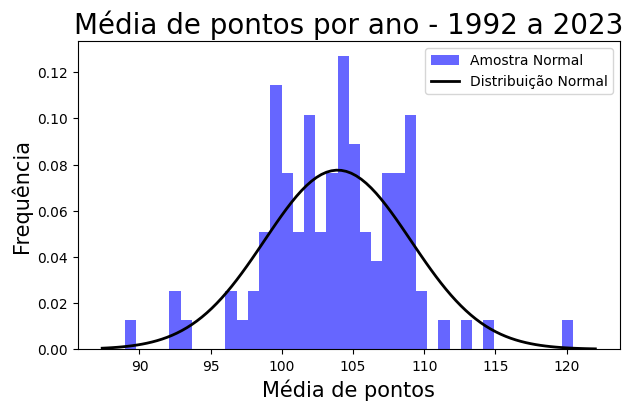

In [13]:
# Lista de médias
# medias_por_ano_1992_2023 = [100.4, 106.3, 110.7, 114.7, 112.8, 117.8, 117.3, 118.2, 115.6, 115.0, 114.6, 111.2, 115.1, 112.9, 110.3, 106.9, 106.9, 103.2, 109.2, 111.7, 121.0, 114.8, 113.7, 112.2, 121.2, 120.5, 119.5, 111.9, 109.7, 115.5, 118.5, 114.0]

# Calcula a média e o desvio padrão
media = np.mean(medias_por_ano_1992_2023)
print(media)
desvio_padrao = np.std(medias_por_ano_1992_2023)

tamanho_da_amostra = 100  # Defina o tamanho da amostra desejado
amostra_normal = np.random.normal(media, desvio_padrao, tamanho_da_amostra)

plt.figure(figsize=(7,4))
plt.hist(amostra_normal, bins=40, color='blue', density=True, alpha=0.6, label='Amostra Normal')
plt.title('Média de pontos por ano - 1992 a 2023', fontsize=20)
plt.xlabel('Média de pontos', fontsize=15)
plt.ylabel('Frequência', fontsize=15)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, desvio_padrao)
plt.plot(x, p, 'k', linewidth=2, label='Distribuição Normal')

plt.legend()
plt.show()


In [9]:
medias_por_ano_1960_1991 = [media_pontos for media_pontos in df_1960_1991['PTS']]
medias_por_ano_1960_1991

[100.4,
 106.3,
 110.7,
 114.7,
 112.8,
 117.8,
 117.3,
 118.2,
 115.6,
 115.0,
 114.6,
 111.2,
 115.1,
 112.9,
 110.3,
 106.9,
 106.9,
 103.2,
 109.2,
 111.7,
 121.0,
 114.8,
 113.7,
 112.2,
 121.2,
 120.5,
 119.5,
 111.9,
 109.7,
 115.5,
 118.5,
 114.0]

113.22812499999999


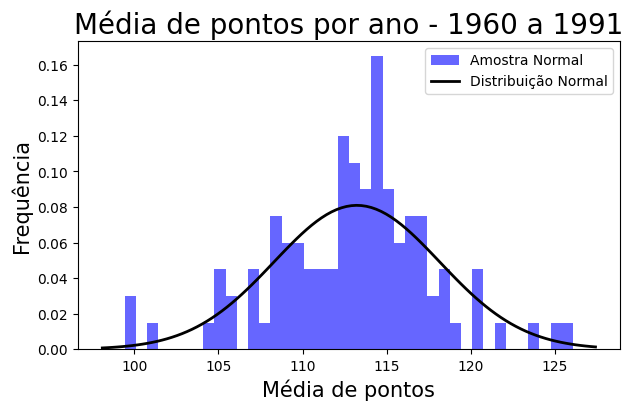

In [10]:
# Lista de médias
medias_por_ano_1960_1991 = [100.4, 106.3, 110.7, 114.7, 112.8, 117.8, 117.3, 118.2, 115.6, 115.0, 114.6, 111.2, 115.1, 112.9, 110.3, 106.9, 106.9, 103.2, 109.2, 111.7, 121.0, 114.8, 113.7, 112.2, 121.2, 120.5, 119.5, 111.9, 109.7, 115.5, 118.5, 114.0]

# Calcula a média e o desvio padrão
media = np.mean(medias_por_ano_1960_1991)
print(media)
desvio_padrao = np.std(medias_por_ano_1960_1991)

tamanho_da_amostra = 100  # Defina o tamanho da amostra desejado
amostra_normal = np.random.normal(media, desvio_padrao, tamanho_da_amostra)

plt.figure(figsize=(7,4))
plt.hist(amostra_normal, bins=40, color='blue', density=True, alpha=0.6, label='Amostra Normal')
plt.title('Média de pontos por ano - 1960 a 1991', fontsize=20)
plt.xlabel('Média de pontos', fontsize=15)
plt.ylabel('Frequência', fontsize=15)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, desvio_padrao)
plt.plot(x, p, 'k', linewidth=2, label='Distribuição Normal')

plt.legend()
plt.show()


In [11]:
stats.ttest_ind(medias_por_ano_1960_1991, medias_por_ano_1992_2023)

TtestResult(statistic=7.278494557699862, pvalue=7.077836527830403e-10, df=62.0)

In [12]:
print(sum(medias_por_ano_1992_2023)/len(medias_por_ano_1992_2023))
print(sum(medias_por_ano_1992_2023))
print(sum(medias_por_ano_1960_1991)/len(medias_por_ano_1960_1991))
print(sum(medias_por_ano_1960_1991))

103.915625
3325.3
113.22812499999998
3623.2999999999993
